#### WRF output cross section from <a href="https://wrf-python.readthedocs.io/en/latest/plot.html#cross-example">wrf-python examples</a> (Adapted by Lauren Getker)
This code utilizes wrf-python's CoordPair and vertcross codes to create vertical cross sections from WRF output files.
Adapted from wrf-python documentation

In [41]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross
from matplotlib.ticker import StrMethodFormatter

#Name of file to create cross section from
filename = "/home/getker/wrf_hugo/wrf_cp_test/wrfout_d01_1989-09-22_03:00:00"

#Name of variable to create cross section of
varname = "W"

#Acceleration of gravity (constant) for converting to geopotential height
g = 9.8

#Latitude of first cross section point
lat1 = 30.15

#Longitude of first cross section point
lon1 = -80.97

# Latitude of second cross section point
lat2 = 32.96

#Longitude of second cross section point
lon2 = -78.21

In [42]:
"""
Open the wrfout file and get geopotential height data to use as our vertical 
"""
data = Dataset(filename, "r", format="NETCDF4")
ph = getvar(data, "PH") # get geopotential perturbation 
phb = getvar(data, "PHB") # get geopotential base state 
z = ph + phb #Add base state and perturbation to get geopotential height
z = (z / 9.8) / 1000 #Convert value to km

if (ph.shape[0] == 49):
    z = z[0:49]

var =  getvar(data, varname)

# Create the start point and end point for the cross section
start_point = CoordPair(lat=30.15, lon=-80.97)
end_point = CoordPair(lat=32.96, lon=-78.21)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(var, z, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

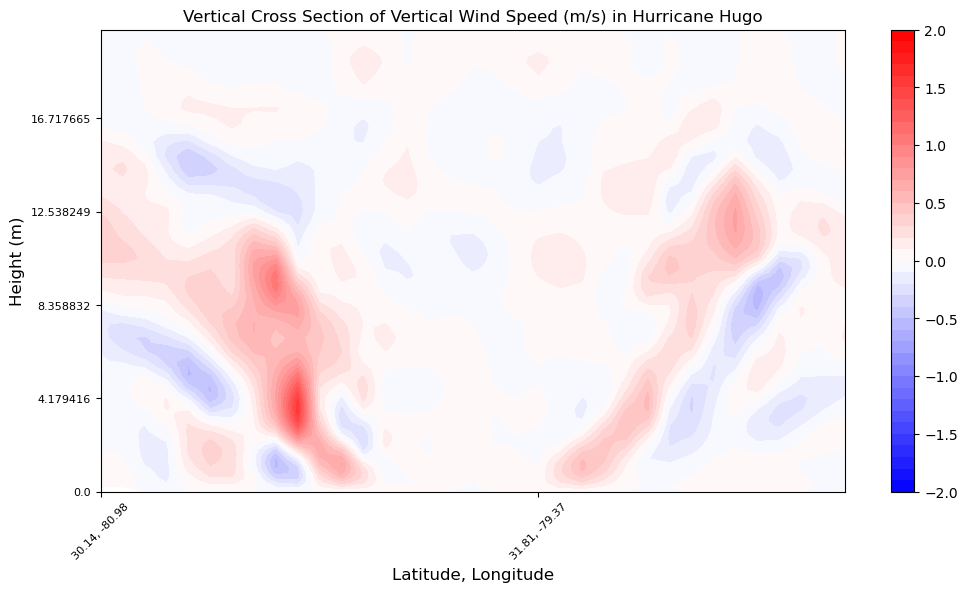

In [43]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
wspd_contours = ax.contourf(to_np(wspd_cross), cmap="bwr", levels = np.arange(-2, 2.1, .1))

plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(vert_vals[::20], fontsize=8)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Vertical Cross Section of Vertical Wind Speed (m/s) in Hurricane Hugo")

plt.show()